In [1]:
# update.packages(ask=FALSE)
# install.packages("broom")
library(simr)
library(Matrix)
library(lme4)
library(emmeans)
library(lattice)## LOADING AND INSPECTING THE DATA
library(lmerTest) ## INFERENTIAL TESTS
library(mice)
library(ggstatsplot)
library(rstantools)
library(ggpubr)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')
# ndr[45:88,]
dim(ndr)

## TURN NUMERICAL VALUES INTO FACTOR/CATEGORICAL VARIABLES
ndr$TIMEP <- factor(ndr$TIMEP)
ndr$GROUP <- factor(ndr$GROUP)
ndr$SUBJECT <- factor(ndr$SUBJECT)
str(ndr)
levels(ndr$GROUP)

## SIMPLE PLOTS
# plot(NDR~TIMEP,data=ndr,col="grey50",pch="o")
# xyplot(NDR~TIMEP,groups=GROUP,data=ndr,pch="+",cex=1.5)
# options(repr.plot.width = 8, repr.plot.height = 6)
# ggline(ndr, x = "TIMEP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
#       legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ ylim(0.6, 1.2) +
# theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
#       axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))+
# stat_compare_means(aes(group= GROUP), size=7, label = "p.signif")


## IDENTIFY OUTLIERS FOR EACH GROUP OR ACROSS TIMEP
# ndr_filt <- filter(ndr, TIMEP==c('TP0') | TIMEP==c('TP10') | TIMEP==c('TP30'))
# ndr_filt <- filter(ndr, GROUP==c('Sham','aV1-gV5','gV1-aV5'))
# dim(ndr_filt)

# options(repr.plot.width = 14, repr.plot.height = 21)
# betweenstats because it was a parallel design n=45
# grouped_ggbetweenstats(data=ndr, x=TIMEP, y=NDR, grouping.var=GROUP, type = "np", pairwise.comparisons=FALSE,
#                       outlier.tagging=TRUE, outlier.label=X, outlier.color='red', effsize.type="eta", outlier.coef=1,
#                        # arguments relevant for ggstatsplot::combine_plots
#                       annotation.args = list(title = "NDR over TIMEP and GROUPs"),
#                       plotgrid.args = list(ncol = 1))
# ## Tukey=1.5
# ndr$NDR[61] <- NA
# ndr$NDR[68] <- NA
# ndr$NDR[101] <- NA
# # Tukey=1.2
# ndr$NDR[48] <- NA
# ndr$NDR[78] <- NA
# ndr$NDR[88] <- NA
# ndr$NDR[56] <- NA
# # Tukey=1
# ndr$NDR[113] <- NA
# ndr$NDR[45] <- NA
# ndr$NDR[56] <- NA
# ndr$NDR[90] <- NA
# ndr$NDR[124] <- NA
# ndr$NDR[131] <- NA
# ggline(ndr, x="TIMEP", y="NDR", add="mean_sd", color="GROUP", palette="jco", size=2, point.size=2,
#        legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ ylim(0.6, 1.2) +
# theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
#       axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))+
# stat_compare_means(aes(group =GROUP), size=7, label = "p.signif") 

# RANDOM INTERCEPT MODEL
# ndr$TIMEP <- relevel(ndr$TIMEP,"TP0")   # changed the intercept to TIMEP:TP0
# mlm1 <- lmer(NDR ~ 1 + TIMEP*GROUP + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
# summary(mlm1)
# anova(mlm1)
# # difflsmeans(mlm1, test.effs="TIMEP+GROUP", ddf="Kenward-Roger")
# # write.csv(difflsmeans(rint, test.effs="GROUP*COHA"),"Interaction.csv")
# emm = emmeans(mlm1, ~ TIMEP+GROUP, ddf="Kenward-Roger")
# pairs(emm, simple='each', adjust="none")
# confint(pairs(emm, simple='each', adjust="none"))

# No Need to change the intercept to TIMEP:TP10/TP30 
# mlm2 <- lmer(NDR ~ 1 + TIMEP+GROUP*V1pV5a + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
# summary(mlm2)
# confint(mlm2)
# anova(mlm2, type=2)
# plot(mlm2, id=0.05) ## Residuals plotted as white noise mean that they have dist. close to N, mean 0 and constant variance
ndr$GROUP <- relevel(ndr$GROUP,"Sham")   # changed the intercept to GROUP:SHAM
mlm3 <- lmer(NDR ~ 1 + TIMEP+GROUP*V1pV5a + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
summary(mlm3)
confint(mlm3)
anova(mlm3, type=2)

## COMPARING RANDOM EFFECTS BY INFORMATION CRITERIA
# AIC(rint) ; BIC(rint)

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘simr’


The following object is masked from ‘package:lme4’:

    getData



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


In case you would like cite this package, cite it as:
     Patil, I. (2018). ggstatsplot: "ggplot2" Based Plots with Statistical Details. CRAN.
     Retrieved from https://cran.r-project.org/web/packages/ggstatsplot/index.html

This is rstantools version 2.1.1

Loading required package: ggplot2



[1] 155  23

'data.frame':	155 obs. of  23 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NDR    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SUBJECT: Factor w/ 44 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ GROUP  : Factor w/ 3 levels "aV1-gV5","gV1-aV5",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TIMEP  : Factor w/ 4 levels "Bsl","TP0","TP10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PSDA   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSDB   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSDG   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ COHA   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ COHB   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ COHG   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ V1pV5a : num  1 1 1 1 1 1 1 1 1 1 ...
 $ V1aV5p : num  1 1 1 1 1 1 1 1 1 1 ...
 $ WPLIA  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ WPLIB  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ WPLIG  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSIT   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSIA   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSIB   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ PSIG   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ IMCOHA : num  1 1 1 1 1 1

[1] "aV1-gV5" "gV1-aV5" "Sham"

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + GROUP * V1pV5a + (1 | SUBJECT)
   Data: ndr

REML criterion at convergence: -32.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5078 -0.4791  0.0737  0.4258  3.3649 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.009015 0.09495 
 Residual             0.023856 0.15445 
Number of obs: 111, groups:  SUBJECT, 44

Fixed effects:
                      Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)           1.042357   0.044737  76.919623  23.300  < 2e-16 ***
TIMEPTP10            -0.116394   0.036412  71.979182  -3.197 0.002067 ** 
TIMEPTP30            -0.132475   0.035993  71.485005  -3.681 0.000448 ***
GROUPaV1-gV5         -0.065580   0.056454  54.740978  -1.162 0.250418    
GROUPgV1-aV5         -0.058116   0.055765  55.783929  -1.042 0.301839    
V1pV5a                0.001443   0.018208 100.198352   0.079 0.93

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.04206471,0.13296624
.sigma,0.12777705,0.17790788
(Intercept),0.95701699,1.12747445
TIMEPTP10,-0.18618492,-0.04638226
TIMEPTP30,-0.20118259,-0.06278061
GROUPaV1-gV5,-0.17302595,0.04272109
GROUPgV1-aV5,-0.16425876,0.04876608
V1pV5a,-0.03325171,0.03619419
GROUPaV1-gV5:V1pV5a,-0.03657595,0.04489294
GROUPgV1-aV5:V1pV5a,-0.05003009,0.02373085


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
TIMEP,0.39976477,0.19988239,2,72.01900,8.3788468,0.0005351423
GROUP,0.03786626,0.01893313,2,52.40166,0.7936558,0.4575483541
V1pV5a,0.03018950,0.03018950,1,87.71862,1.2655104,0.2636793982
GROUP:V1pV5a,0.04806315,0.02403158,2,94.42652,1.0073769,0.3690658192


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 24 row(s) containing missing values (geom_path).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 24 row(s) containing missing values (geom_path).”


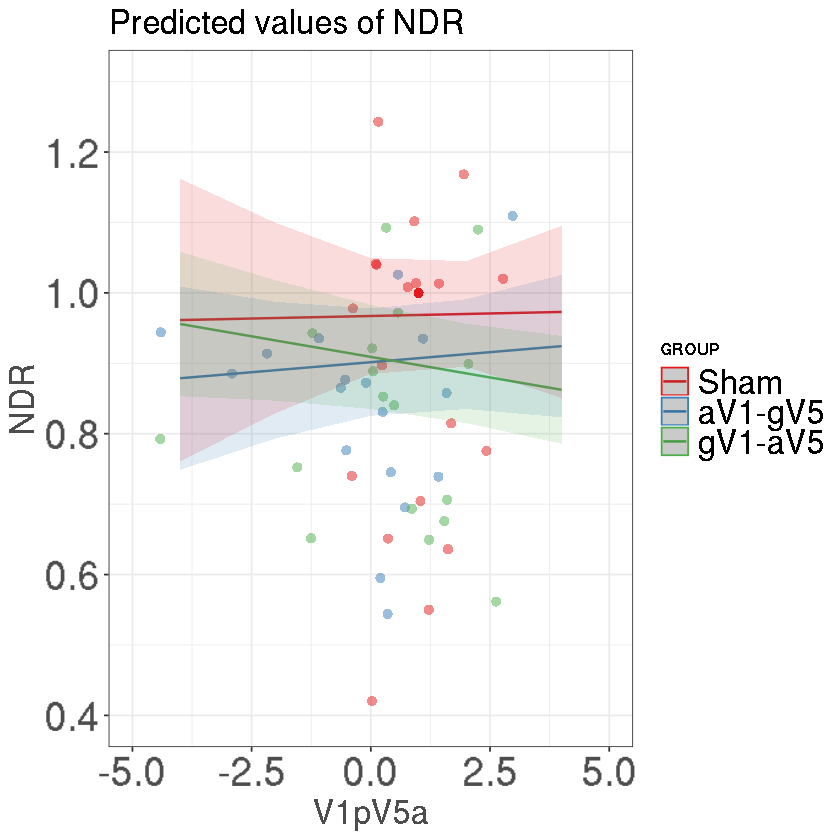

In [51]:
# install.packages('effects')
library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)
plot_model(mlm3, type = "eff", show.data = T, terms = c('V1pV5a','GROUP'), axis.lim= list(c(-5, 5), c(0.4, 1.3)))#,'TIMEP'))
ggsave('V1pV5a_3Groups.png', plot = last_plot(), scale = 1, width = 20, height = 10, units = c('cm'), dpi = 300, limitsize = TRUE)

# emmip(mlm3, 'WPLIG' ~ 'GROUP')

In [13]:
### Single GROUP evaluation over time

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')

G3 <- ndr[which(ndr$GROUP=='aV1-gV5'), ]
G4 <- ndr[which(ndr$GROUP=='gV1-aV5'), ]
G5 <- ndr[which(ndr$GROUP=='Sham'), ]

G3$TIMEP <- relevel(G3$TIMEP,"TP10")   # changed the intercept to TIMEP:TP0?
G4$TIMEP <- relevel(G4$TIMEP,"TP10")   # changed the intercept to TIMEP:TP0?
G5$TIMEP <- relevel(G5$TIMEP,"TP10")   # changed the intercept to TIMEP:TP0?

mlm4 <- lmer(NDR ~ 1 + TIMEP + (1|SUBJECT), data=G3, REML=TRUE)
summary(mlm4)
confint(mlm4)
mlm5 <- lmer(NDR ~ 1 + TIMEP + (1|SUBJECT), data=G4, REML=TRUE)
summary(mlm5)
confint(mlm5)
mlm6 <- lmer(NDR ~ 1 + TIMEP + (1|SUBJECT), data=G5, REML=TRUE)
summary(mlm6)
confint(mlm6)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + (1 | SUBJECT)
   Data: G3

REML criterion at convergence: -25.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.90025 -0.36438  0.03442  0.47117  2.91387 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.001418 0.03765 
 Residual             0.027463 0.16572 
Number of obs: 54, groups:  SUBJECT, 14

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.80859    0.04903 49.82918  16.490  < 2e-16 ***
TIMEPBsl     0.19141    0.06531 38.78696   2.931  0.00564 ** 
TIMEPTP0     0.08383    0.06531 38.78696   1.284  0.20687    
TIMEPTP30    0.03763    0.06531 38.78696   0.576  0.56779    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) TIMEPB TIMEPTP0
TIMEPBsl  -0.719                
TIMEPTP0  -0.719  0.540         
TIMEPTP30 -

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.1088836
.sigma,0.13012736,0.1989454
(Intercept),0.71430451,0.9030166
TIMEPBsl,0.06583983,0.3181964
TIMEPTP0,-0.04173930,0.2106173
TIMEPTP30,-0.08793912,0.1644175


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + (1 | SUBJECT)
   Data: G4

REML criterion at convergence: -19.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2148 -0.5897  0.0774  0.5992  3.2822 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.007647 0.08745 
 Residual             0.027541 0.16596 
Number of obs: 57, groups:  SUBJECT, 15

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.83123    0.04997 48.13963  16.635  < 2e-16 ***
TIMEPBsl     0.16877    0.06183 39.99398   2.729  0.00938 ** 
TIMEPTP0     0.04525    0.06183 39.99398   0.732  0.46852    
TIMEPTP30   -0.04130    0.06446 40.95285  -0.641  0.52531    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) TIMEPB TIMEPTP0
TIMEPBsl  -0.643                
TIMEPTP0  -0.643  0.520         
TIMEPTP30 -0.618  0.4

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.15608411
.sigma,0.13117255,0.20102488
(Intercept),0.73504657,0.92757478
TIMEPBsl,0.04940752,0.28838462
TIMEPTP0,-0.07410996,0.16486714
TIMEPTP30,-0.16562644,0.08341061


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + (1 | SUBJECT)
   Data: G5

REML criterion at convergence: -4.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.94540 -0.53708  0.02758  0.64342  1.83887 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.02155  0.1468  
 Residual             0.03143  0.1773  
Number of obs: 58, groups:  SUBJECT, 15

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.94977    0.06096 38.60113  15.582   <2e-16 ***
TIMEPBsl     0.05023    0.06614 40.42600   0.759    0.452    
TIMEPTP0    -0.04671    0.06614 40.42600  -0.706    0.484    
TIMEPTP30   -0.04251    0.06755 40.73402  -0.629    0.533    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) TIMEPB TIMEPTP0
TIMEPBsl  -0.565                
TIMEPTP0  -0.565  0.521         
TIMEPTP30 -0

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.07997201,0.23407149
.sigma,0.14040788,0.21456857
(Intercept),0.83121720,1.06757477
TIMEPBsl,-0.07798236,0.17780187
TIMEPTP0,-0.17492089,0.08086334
TIMEPTP30,-0.17326693,0.08789225


[1] 176  20

'data.frame':	176 obs. of  20 variables:
 $ X      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ NDR    : num  41.4 29.7 21.5 12.5 39.4 ...
 $ SUBJECT: Factor w/ 44 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ GROUP  : Factor w/ 3 levels "aV1-gV5","gV1-aV5",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TIMEP  : Factor w/ 4 levels "Bsl","TP0","TP10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ PSDA   : num  2.86e-13 5.08e-13 4.63e-13 4.06e-13 4.20e-13 ...
 $ PSDB   : num  1.68e-13 2.29e-13 1.48e-13 2.79e-13 3.90e-13 ...
 $ PSDG   : num  1.31e-13 1.81e-13 1.46e-13 2.19e-13 1.55e-13 ...
 $ COHA   : num  0.157 0.328 0.118 0.281 0.357 ...
 $ COHB   : num  0.1234 0.2916 0.0956 0.2891 0.3165 ...
 $ COHG   : num  0.1145 0.2893 0.0954 0.2341 0.3401 ...
 $ V1pV5a : num  0.5188 2.5105 -0.7129 -0.5849 0.0852 ...
 $ V1aV5p : num  1.327 2.001 0.574 1.348 3.106 ...
 $ WPLIA  : num  0.1236 0.1468 0.0929 0.1653 0.0965 ...
 $ WPLIB  : num  0.133 0.142 0.099 0.104 0.091 ...
 $ WPLIG  : num  0.112 0.131 0.153 0.139 0.136 ...
 $ PSIT   

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + GROUP + (1 | SUBJECT)
   Data: ndr

REML criterion at convergence: 1330.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4903 -0.3473  0.0139  0.4508  2.3140 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 347.81   18.650  
 Residual              59.56    7.717  
Number of obs: 176, groups:  SUBJECT, 44

Fixed effects:
             Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    40.116      5.019  44.490   7.992 3.83e-10 ***
TIMEPTP0       -5.797      1.645 129.000  -3.523  0.00059 ***
TIMEPTP10      -6.146      1.645 129.000  -3.735  0.00028 ***
TIMEPTP30      -7.418      1.645 129.000  -4.508 1.45e-05 ***
GROUPaV1-gV5   -6.214      7.077  41.000  -0.878  0.38508    
GROUPgV1-aV5    7.155      6.954  41.000   1.029  0.30954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of 

$`simple contrasts for TIMEP`
GROUP = Sham:
 contrast    estimate   SE  df t.ratio p.value
 Bsl - TP0      5.797 1.65 129 3.523   0.0006 
 Bsl - TP10     6.146 1.65 129 3.735   0.0003 
 Bsl - TP30     7.418 1.65 129 4.508   <.0001 
 TP0 - TP10     0.349 1.65 129 0.212   0.8324 
 TP0 - TP30     1.621 1.65 129 0.985   0.3263 
 TP10 - TP30    1.272 1.65 129 0.773   0.4408 

GROUP = aV1-gV5:
 contrast    estimate   SE  df t.ratio p.value
 Bsl - TP0      5.797 1.65 129 3.523   0.0006 
 Bsl - TP10     6.146 1.65 129 3.735   0.0003 
 Bsl - TP30     7.418 1.65 129 4.508   <.0001 
 TP0 - TP10     0.349 1.65 129 0.212   0.8324 
 TP0 - TP30     1.621 1.65 129 0.985   0.3263 
 TP10 - TP30    1.272 1.65 129 0.773   0.4408 

GROUP = gV1-aV5:
 contrast    estimate   SE  df t.ratio p.value
 Bsl - TP0      5.797 1.65 129 3.523   0.0006 
 Bsl - TP10     6.146 1.65 129 3.735   0.0003 
 Bsl - TP30     7.418 1.65 129 4.508   <.0001 
 TP0 - TP10     0.349 1.65 129 0.212   0.8324 
 TP0 - TP30     1.621 1.65 

,contrast,GROUP,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bsl - TP0,Sham,5.796771,1.64533,129,2.541444,9.052097
2,Bsl - TP10,Sham,6.145770,1.64533,129,2.890443,9.401096
3,Bsl - TP30,Sham,7.417865,1.64533,129,4.162539,10.673192
4,TP0 - TP10,Sham,0.348999,1.64533,129,-2.906327,3.604325
5,TP0 - TP30,Sham,1.621095,1.64533,129,-1.634232,4.876421
6,TP10 - TP30,Sham,1.272096,1.64533,129,-1.983231,4.527422
7,Bsl - TP0,aV1-gV5,5.796771,1.64533,129,2.541444,9.052097
8,Bsl - TP10,aV1-gV5,6.145770,1.64533,129,2.890443,9.401096
9,Bsl - TP30,aV1-gV5,7.417865,1.64533,129,4.162539,10.673192


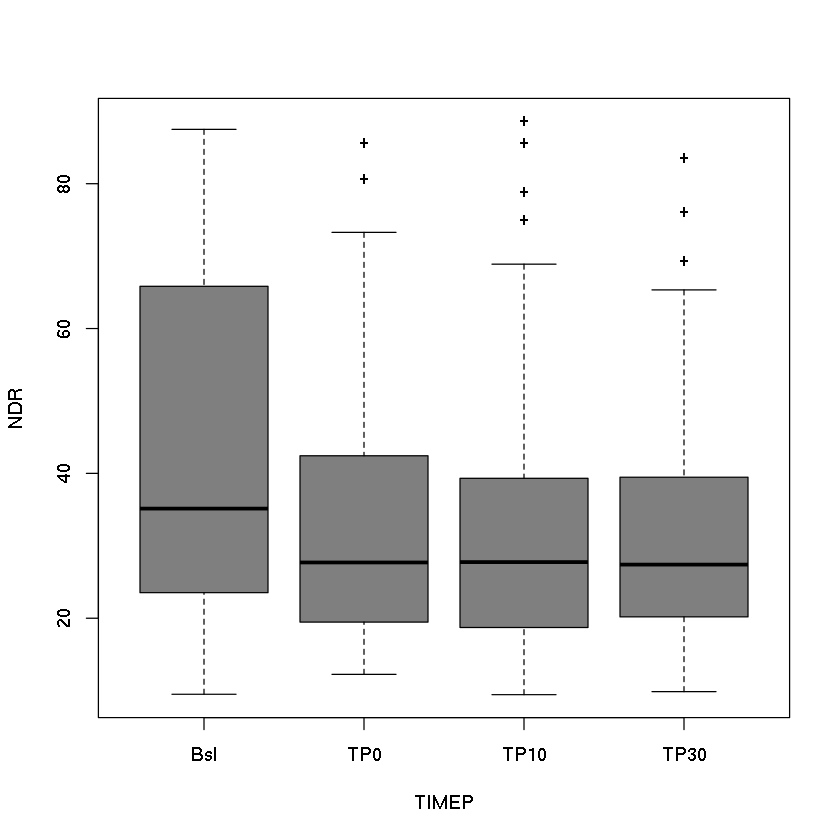

In [64]:
### Raw dataset. Is the baseline different and comparable between groups? YESSSSS!

library(simr)
library(Matrix)
library(lme4)
library(emmeans)
library(lattice)## LOADING AND INSPECTING THE DATA
library(lmerTest) ## INFERENTIAL TESTS
# install.packages('mice')
library(mice)
library(ggplot2)

ndr <- read.table('II_Mixed_mod_All_Raw.txt',header=TRUE,sep='\t')
# ndr[45:88,]
dim(ndr)

## SIMPLE PLOTS
plot(NDR~TIMEP,data=ndr,col="grey50",pch="+")
# xyplot(NDR~TIMEP,groups=GROUP,data=ndr,pch="+",cex=1.5)

## TURN NUMERICAL VALUES INTO FACTOR/CATEGORICAL VARIABLES
ndr$TIMEP <- factor(ndr$TIMEP)
ndr$GROUP <- factor(ndr$GROUP)
ndr$SUBJECT <- factor(ndr$SUBJECT)
str(ndr)

## RANDOM INTERCEPT MODEL
ndr$TIMEP <- relevel(ndr$TIMEP,"Bsl")   # changed the intercept to TIMEP:TP0
ndr$GROUP <- relevel(ndr$GROUP,"Sham")   # changed the intercept to GROUP:Sham
mlm1 <- lmer(NDR ~ 1 + TIMEP + GROUP + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
summary(mlm1)
emm = emmeans(mlm1, ~ TIMEP + GROUP, ddf="Kenward-Roger")
pairs(emm, simple='each', adjust="none")
confint(pairs(emm, simple='each', adjust="none"))


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + GROUP * WPLIA + (1 | SUBJECT)
   Data: ndr

REML criterion at convergence: -58.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0621 -0.3314 -0.0333  0.3618  3.8453 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.003695 0.06079 
 Residual             0.016653 0.12905 
Number of obs: 72, groups:  SUBJECT, 29

Fixed effects:
                   Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         0.94273    0.12676 65.83496   7.437 2.73e-10 ***
TIMEPTP10          -0.13833    0.03897 49.32241  -3.550 0.000858 ***
TIMEPTP30          -0.18210    0.03661 47.91072  -4.974 8.84e-06 ***
GROUPgV1-aV5       -0.34718    0.16636 64.60647  -2.087 0.040846 *  
WPLIA               0.06165    0.12536 65.99989   0.492 0.624520    
GROUPgV1-aV5:WPLIA  0.33871    0.16802 65.68951   2.016 0.047900 *  
---
Signif. codes:  0 ‘***’ 

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.00000000,0.10002080
.sigma,0.10288371,0.15423587
(Intercept),0.70195616,1.18410341
TIMEPTP10,-0.21295135,-0.06316277
TIMEPTP30,-0.25256607,-0.11176347
GROUPgV1-aV5,-0.66647887,-0.03025611
WPLIA,-0.17739780,0.29976490
GROUPgV1-aV5:WPLIA,0.01868658,0.66240191


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
TIMEP,0.45350119,0.22675059,2,48.52196,13.615998,2.024423e-05
GROUP,0.07252876,0.07252876,1,64.60647,4.355232,4.084577e-02
WPLIA,0.14399076,0.14399076,1,65.54380,8.646407,4.523607e-03
GROUP:WPLIA,0.06767890,0.06767890,1,65.68951,4.064006,4.789977e-02


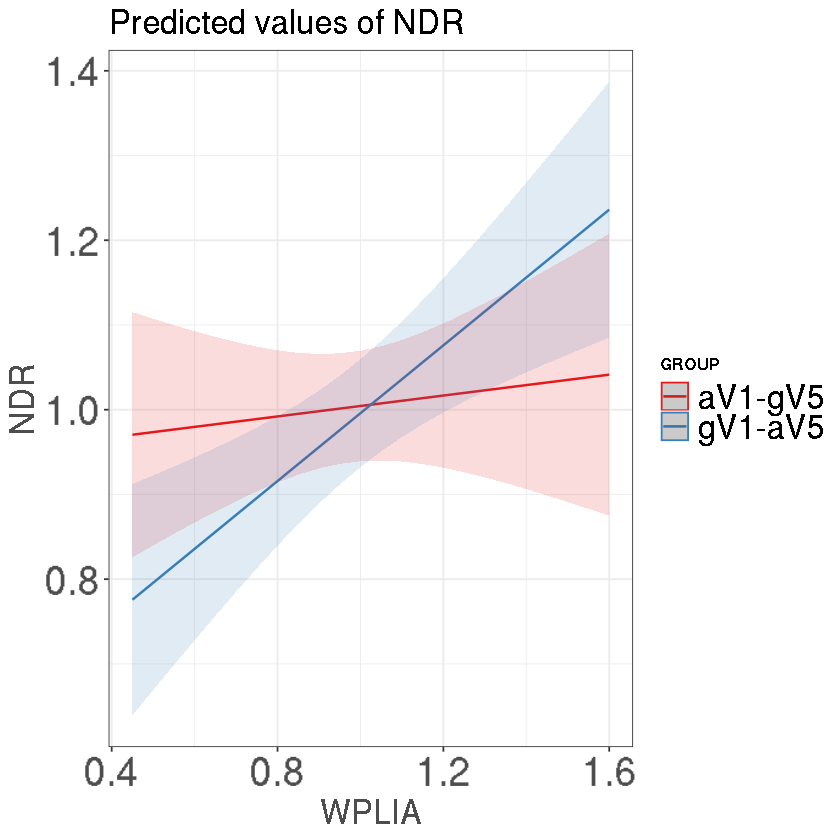

In [84]:
### Difference between Verum groups

library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')

ndr$GROUP <- relevel(ndr$GROUP,"aV1-gV5")   # changed the intercept to GROUP
ndr$TIMEP <- relevel(ndr$TIMEP,"Bsl")   # changed the intercept to GROUP
ndr <- ndr[!(ndr$GROUP=="Sham"),] # drop all data from Sham

mlm4 <- lmer(NDR ~ 1 + TIMEP+GROUP*WPLIA + (1|SUBJECT), data=ndr, REML=TRUE)#, na.action="na.fail")
summary(mlm4)
confint(mlm4)
anova(mlm4, type=2)
plot_model(mlm4, type = "pred", terms = c("WPLIA", "GROUP"))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


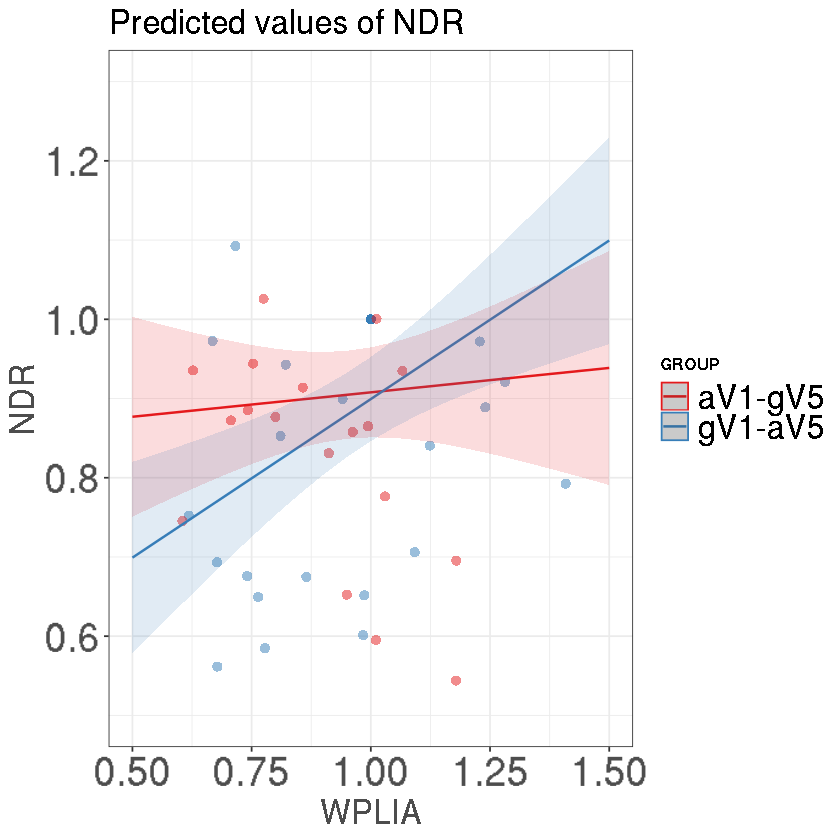

In [90]:
### Correlation graphs 2 Verum groups against each other

# install.packages('effects')
library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)
plot_model(mlm4, type = "eff", show.data = T, terms = c('WPLIA','GROUP'), axis.lim= list(c(0.5,1.5), c(0.5, 1.3)))#,'TIMEP'))
ggsave('WPLIA_2Groups.png', plot = last_plot(), scale = 1, width = 20, height = 10, units = c('cm'), dpi = 300, limitsize = TRUE)

[1] "aV1-gV5" "gV1-aV5" "Sham"

[1] "Verum" "Sham"

Warning message:
“Removed 22 rows containing non-finite values (stat_summary).”
Warning message:
“Removed 22 rows containing non-finite values (stat_compare_means).”


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + TIMEP + GROUP * WPLIG + (1 | SUBJECT)
   Data: ndr

REML criterion at convergence: -67.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0671 -0.4631  0.0291  0.4476  3.8079 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.006409 0.08006 
 Residual             0.021576 0.14689 
Number of obs: 111, groups:  SUBJECT, 44

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       0.55965    0.17071 102.57557   3.278 0.001426 ** 
TIMEPTP10        -0.10262    0.03511  74.58875  -2.923 0.004588 ** 
TIMEPTP30        -0.12621    0.03405  73.76832  -3.706 0.000404 ***
GROUPSham         0.93329    0.21514 103.30805   4.338 3.35e-05 ***
WPLIG             0.41563    0.16963 101.97689   2.450 0.015981 *  
GROUPSham:WPLIG  -0.86080    0.21304 101.75674  -4.041 0.000104 ***
---
Signif. codes:  0 ‘***’ 0.001 

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.02567752,0.11781456
.sigma,0.12253681,0.17032649
(Intercept),0.23050733,0.88782206
TIMEPTP10,-0.17030955,-0.03440432
TIMEPTP30,-0.19182245,-0.05995758
GROUPSham,0.51890867,1.35157766
WPLIG,0.08947498,0.74261019
GROUPSham:WPLIG,-1.27453727,-0.45090340


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
TIMEP,0.3453402,0.1726701,2,74.54516,8.002972,7.102725e-04
GROUP,0.4060465,0.4060465,1,103.30805,18.819583,3.352981e-05
WPLIG,0.0335297,0.0335297,1,102.06516,1.554046,2.153926e-01
GROUP:WPLIG,0.3522445,0.3522445,1,101.75674,16.325947,1.037002e-04


$`simple contrasts for TIMEP`
GROUP = Verum:
 contrast    estimate     SE   df t.ratio p.value
 Bsl - TP10    0.1026 0.0352 71.3 2.914   0.0048 
 Bsl - TP30    0.1262 0.0341 70.4 3.697   0.0004 
 TP10 - TP30   0.0236 0.0374 72.2 0.631   0.5303 

GROUP = Sham:
 contrast    estimate     SE   df t.ratio p.value
 Bsl - TP10    0.1026 0.0352 71.3 2.914   0.0048 
 Bsl - TP30    0.1262 0.0341 70.4 3.697   0.0004 
 TP10 - TP30   0.0236 0.0374 72.2 0.631   0.5303 

Degrees-of-freedom method: kenward-roger 

$`simple contrasts for GROUP`
TIMEP = Bsl:
 contrast     estimate     SE   df t.ratio p.value
 Verum - Sham  -0.0787 0.0394 39.8 -1.998  0.0526 

TIMEP = TP10:
 contrast     estimate     SE   df t.ratio p.value
 Verum - Sham  -0.0787 0.0394 39.8 -1.998  0.0526 

TIMEP = TP30:
 contrast     estimate     SE   df t.ratio p.value
 Verum - Sham  -0.0787 0.0394 39.8 -1.998  0.0526 

Degrees-of-freedom method: kenward-roger 


,contrast,GROUP,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bsl - TP10,Verum,0.10262308,0.03521946,71.28469,0.03240233,0.17284384
2,Bsl - TP30,Verum,0.12620620,0.03413419,70.41645,0.05813477,0.19427762
3,TP10 - TP30,Verum,0.02358311,0.03740090,72.22189,-0.05097032,0.09813654
4,Bsl - TP10,Sham,0.10262308,0.03521946,71.28469,0.03240233,0.17284384
5,Bsl - TP30,Sham,0.12620620,0.03413419,70.41645,0.05813477,0.19427762
6,TP10 - TP30,Sham,0.02358311,0.03740090,72.22189,-0.05097032,0.09813654
,contrast,TIMEP,estimate,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Verum - Sham,Bsl,-0.07872659,0.03940385,39.78534,-0.1583781,0.0009249465


GROUP,TIMEP,N,NDR,sd,se,ci
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Verum,Bsl,29,1.0000000,0.0000000,0.00000000,0.00000000
Verum,TP0,29,0.8841769,0.2139038,0.03972093,0.08136465
Verum,TP10,20,0.8394572,0.2204343,0.04929060,0.10316641
Verum,TP30,23,0.8169281,0.1806023,0.03765818,0.07809829
Sham,Bsl,15,1.0000000,0.0000000,0.00000000,0.00000000
Sham,TP0,15,0.9030615,0.2317670,0.05984198,0.12834827
Sham,TP10,13,0.9509429,0.3052209,0.08465304,0.18444313
Sham,TP30,11,0.9778468,0.2445023,0.07372022,0.16425889


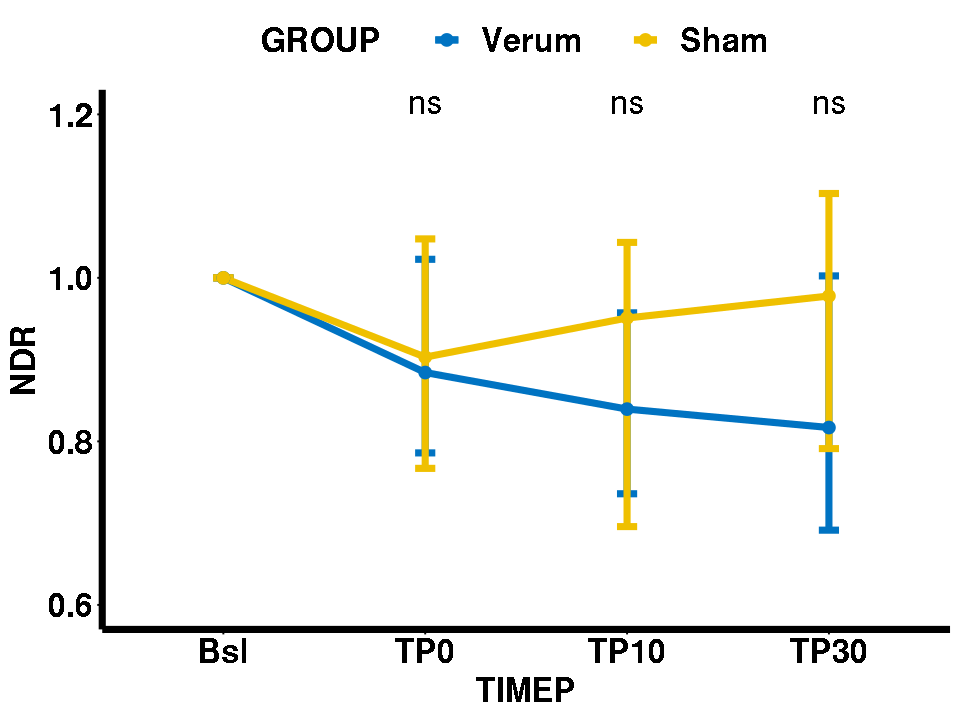

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NDR ~ 1 + GROUP + (1 | SUBJECT)
   Data: ndr

REML criterion at convergence: -62.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6180 -0.5741  0.2021  0.6132  2.7832 

Random effects:
 Groups   Name        Variance Std.Dev.
 SUBJECT  (Intercept) 0.00934  0.09665 
 Residual             0.03002  0.17326 
Number of obs: 155, groups:  SUBJECT, 44

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.89636    0.02504 43.21403  35.794   <2e-16 ***
GROUPSham    0.05339    0.04256 42.41621   1.254    0.217    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
GROUPSham -0.588

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.05034832,0.1352448
.sigma,0.15284225,0.1985137
(Intercept),0.84744606,0.9455189
GROUPSham,-0.03043357,0.1364436


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
GROUP,0.04723591,0.04723591,1,42.41621,1.573578,0.2165569


`geom_smooth()` using formula 'y ~ x'



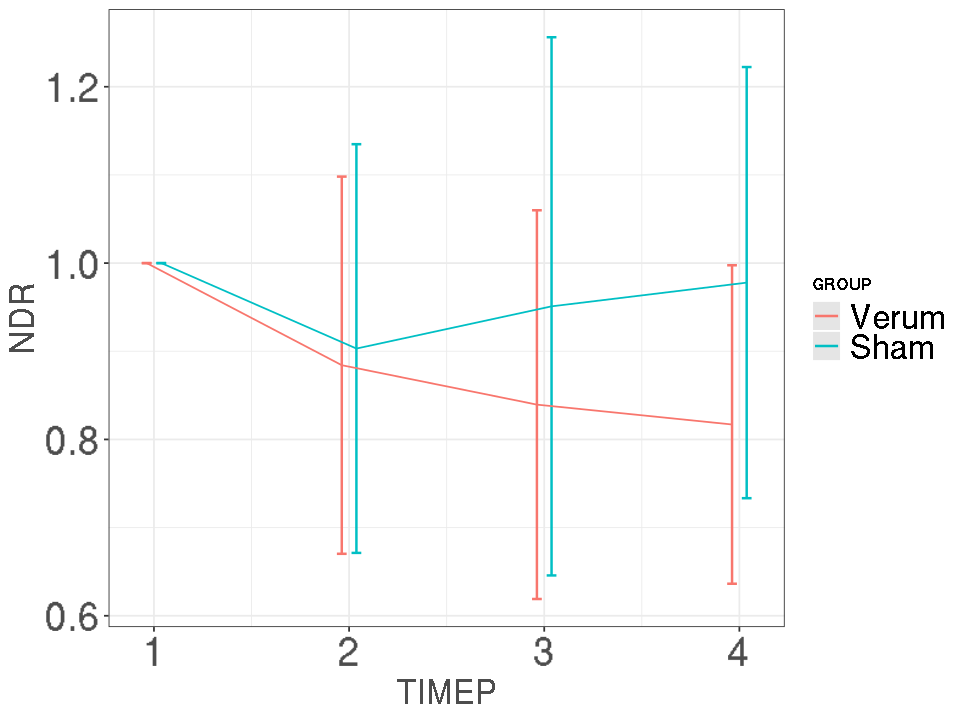

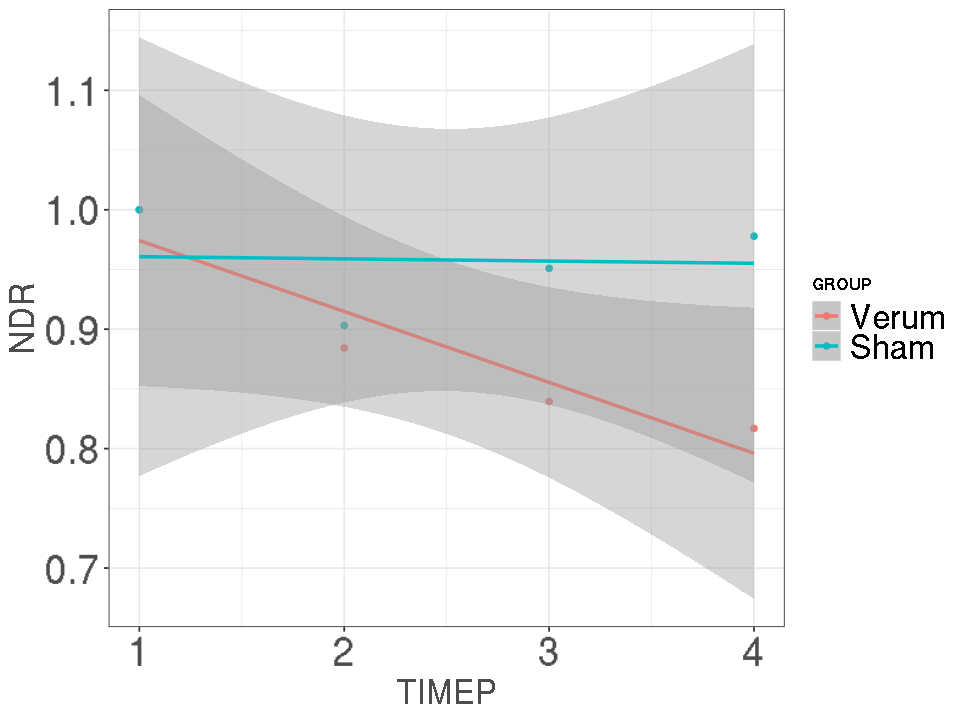

In [21]:
### Grouping 2 Verum groups in a single one 

# install.packages('Rmisc')
library(sjPlot)
library(ggplot2)
library(Rmisc)
library(lmerTest) 
library(emmeans)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')
levels(ndr$GROUP)
levels(ndr$GROUP) <- c("Verum", "Verum", "Sham")
levels(ndr$GROUP)

## SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(ndr, x = "TIMEP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ ylim(0.6, 1.2) +
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))+
stat_compare_means(aes(group= GROUP), size=7, label = "p.signif")

## IDENTIFY OUTLIERS FOR EACH GROUP OR ACROSS TIMEP
# betweenstats because it was a parallel design n=45
# options(repr.plot.width = 14, repr.plot.height = 21)
# grouped_ggbetweenstats(data=ndr, x=TIMEP, y=NDR, grouping.var=GROUP, type = "np", pairwise.comparisons=FALSE,
#                       outlier.tagging=TRUE, outlier.label=X, outlier.color='red', effsize.type="eta", outlier.coef=1,
#                        # arguments relevant for ggstatsplot::combine_plots
#                       annotation.args = list(title = "NDR over TIMEP and GROUPs"),
#                       plotgrid.args = list(ncol = 1))
# ## Tukey=1.5
# ndr$NDR[48] <- NA
# ndr$NDR[45] <- NA
# ndr$NDR[101] <- NA
# ndr$NDR[68] <- NA
# ndr$NDR[56] <- NA
# ## Tukey=1.2
# ndr$NDR[61] <- NA
# ndr$NDR[68] <- NA
# ndr$NDR[78] <- NA
# ## Tukey=1
# ndr$NDR[139] <- NA
# ndr$NDR[113] <- NA
# options(repr.plot.width = 8, repr.plot.height = 6)
# ggline(ndr, x = "TIMEP", y = "NDR", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
#       legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ ylim(0.6, 1.2) +
# theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
#       axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))+
# stat_compare_means(aes(group= GROUP), size=7, label = "p.signif")

# MODEL GROUP DIFFERENCES ACROSS TIMEP
# ndr$TIMEP <- relevel(ndr$TIMEP,"TP0")   # changed the intercept to TIMEP:TP0
mlm5 <- lmer(NDR ~ 1 + TIMEP+GROUP*WPLIG + (1|SUBJECT), data=ndr, REML=TRUE)
summary(mlm5)
confint(mlm5)
anova(mlm5, type=2)
emm5 = emmeans(mlm5, ~ TIMEP+GROUP, ddf="Kenward-Roger")
pairs(emm5, simple='each', adjust="none")
confint(pairs(emm5, simple='each', adjust="none"))

# Calculate SD, SE, CI from the model
ndr_int <- summarySE(ndr, measurevar="NDR", groupvars=c("GROUP","TIMEP"))
ndr_int

# Use GROUP as a factor and TIMEP rather as numeric
ndr_int$GROUP <- factor(ndr_int$GROUP)
ndr_int$TIMEP <- c(ndr_int$TIMEP)

pd <- position_dodge(0.15) # move them .05 to the left and right
ggplot(ndr_int, aes(x=TIMEP, y=NDR, colour=GROUP)) + 
    geom_errorbar(aes(ymin=NDR-sd, ymax=NDR+sd), width=.1, position=pd) +
    geom_line(position=pd)
#     scale_x_discrete(breaks=c("1","2","3","4"),
#                      labels=c("Bsl","TP0","TP10","TP30"))

mlm6 <- lmer(NDR ~ 1 + GROUP + (1|SUBJECT), data=ndr, REML=TRUE)
summary(mlm6)
confint(mlm6)
anova(mlm6, type=2)

# Fit first degree polynomial equation
fit  <- lm(NDR ~ GROUP, data=ndr)
ggplot(data=ndr_int, aes(x=TIMEP, y=NDR, colour=GROUP))+
        geom_point() +
        geom_smooth(method="lm")

# Fit high order degree polynomial equation
# fit2  <- lm(NDR ~ poly(GROUP,2), data=ndr)
# ggplot(data=ndr_int, aes(x=TIMEP, y=NDR, colour=GROUP))+
#         geom_point() +
#         geom_smooth(method="lm")


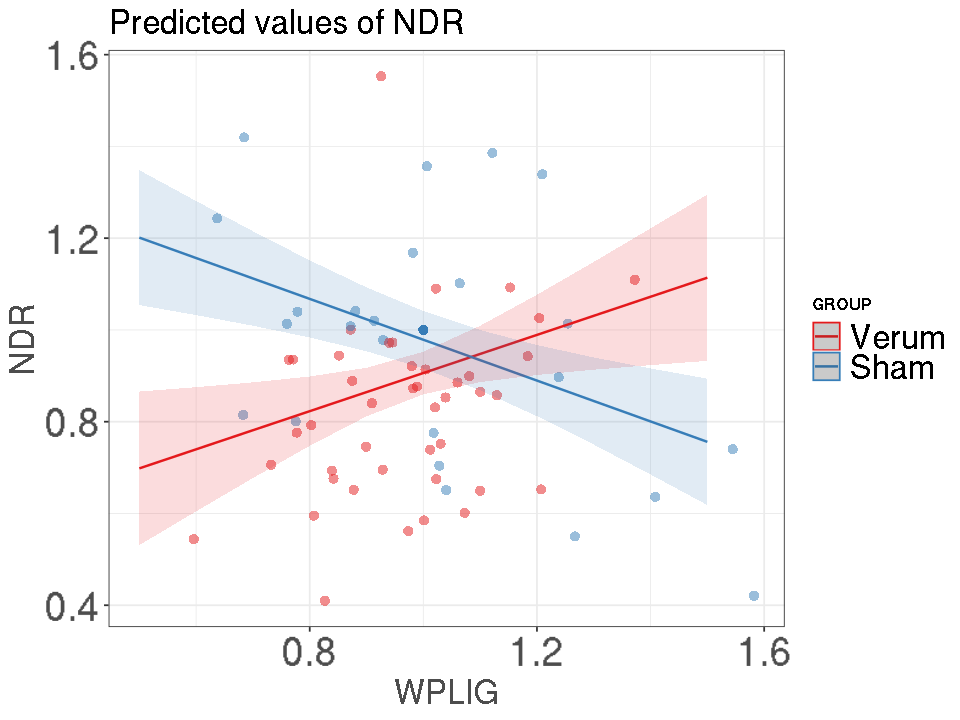

In [15]:
### Correlation graphs Verum vs. Sham

# install.packages('effects')
library(sjPlot)
library(ggplot2)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)
plot_model(mlm5, type = "eff", show.data = T, terms = c('WPLIG','GROUP'))#, axis.lim= list(c(0.5,1.5), c(0.5, 1.3)))#,'TIMEP'))
# ggsave('WPLIA_2Groups.png', plot = last_plot(), scale = 1, width = 20, height = 10, units = c('cm'), dpi = 300, limitsize = TRUE)

Loading required package: lattice

Loading required package: plyr

Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




[1] "aV1-gV5" "gV1-aV5" "Sham"

[1] "Bsl"  "TP0"  "TP10" "TP30"

[1] 72 23

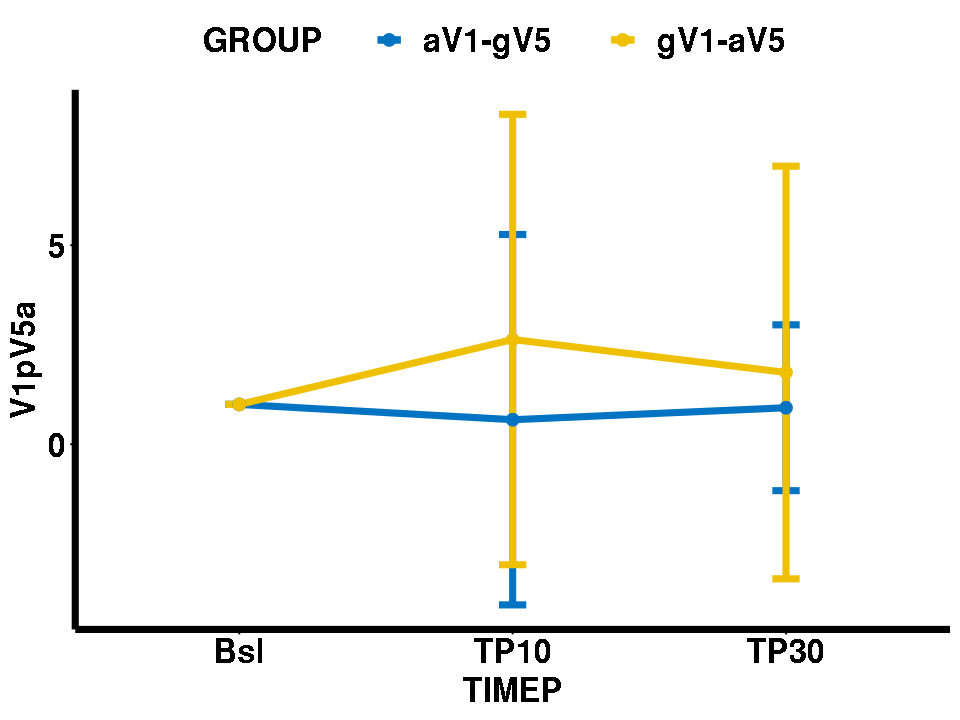

In [1]:
### Grouping 2 Verum groups in a single one 

# install.packages('Rmisc')
library(sjPlot)
library(ggplot2)
library(Rmisc)
library(lmerTest) 
library(emmeans)
library(ggpubr)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')
ndr <- ndr[!(ndr$TIMEP=="TP0"),] # drop all data from TP0
ndr <- ndr[!(ndr$GROUP=="Sham"),] # drop all data from Sham
# levels(ndr$GROUP) <- c("Verum", "Verum", "Sham")
levels(ndr$GROUP)
levels(ndr$TIMEP)
dim(ndr)

## SIMPLE PLOTS
options(repr.plot.width = 8, repr.plot.height = 6)
ggline(ndr, x = "TIMEP", y = "V1pV5a", add = "mean_sd", color = "GROUP", palette = "jco", size=2, point.size=2,
      legend="top", legend.title="GROUP", font.legend=c(24, "bold"))+ #ylim(-2, 7) + 
theme(axis.title.x=element_text(size=24, face="bold"), axis.title.y=element_text(size=24, face="bold"), 
      axis.line=element_line(size=2), axis.text=element_text(size=24, face="bold"))#+
# stat_compare_means(aes(group= GROUP), size=7, label = "p.signif")

[1] 155  23

[1] "aV1-gV5" "gV1-aV5" "Sham"

[1] "Bsl"  "TP0"  "TP10" "TP30"

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



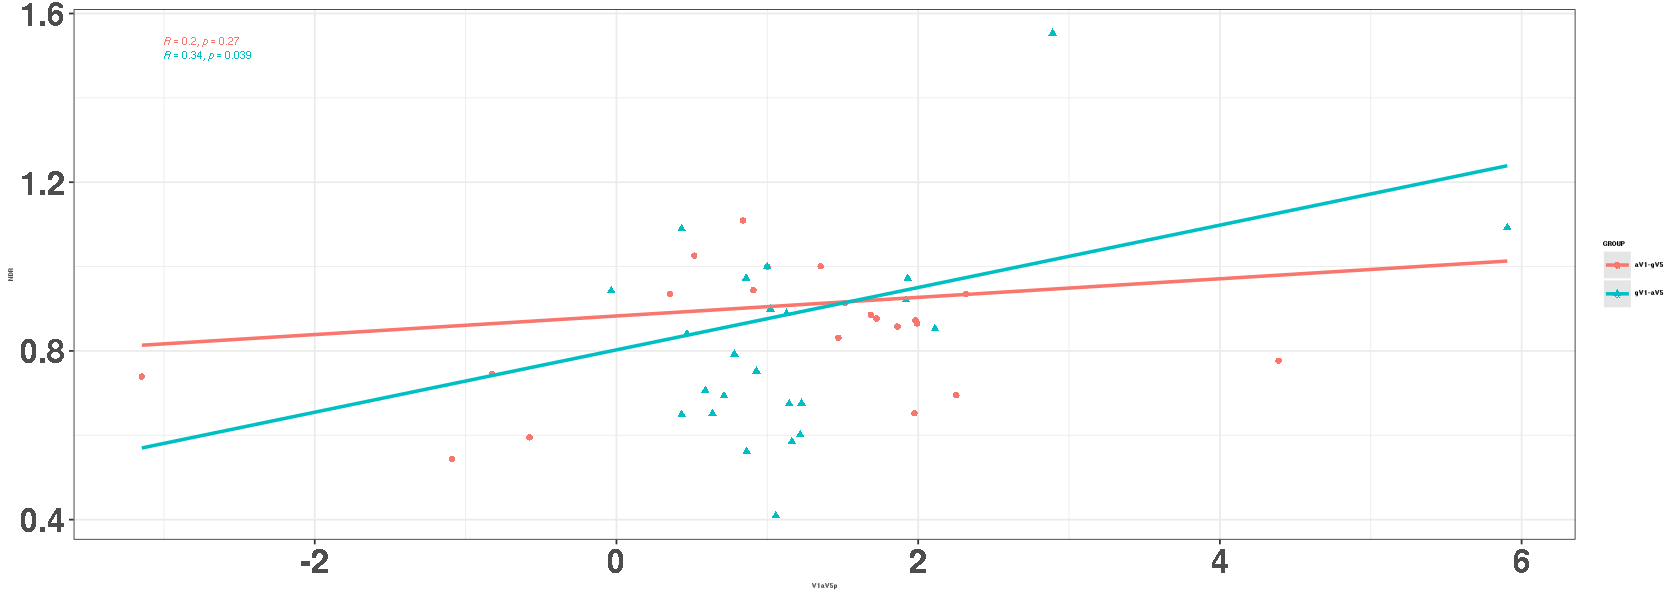

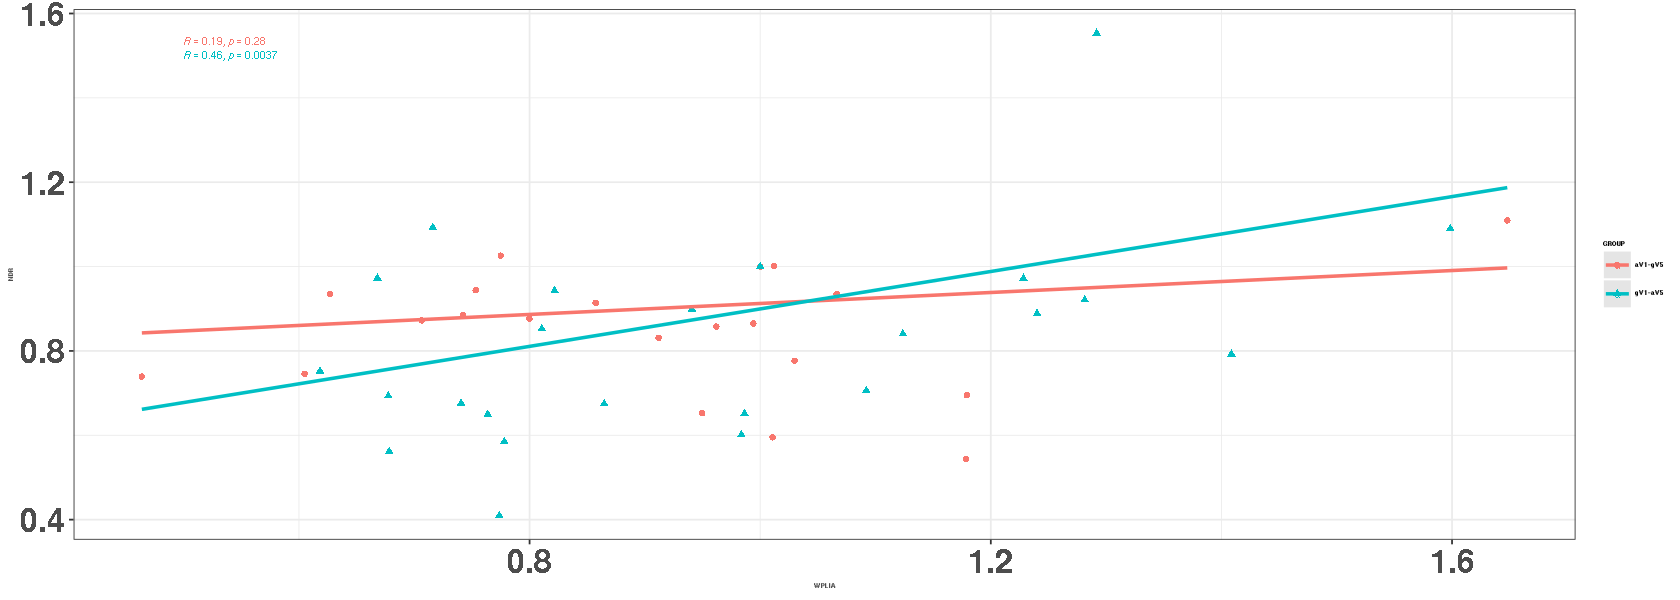

In [3]:
### Correlation graphs: EEG vs. NDR

# install.packages('Rmisc')
library(sjPlot)
library(ggplot2)
library(Rmisc)
library(lmerTest) 
library(emmeans)
library(ggpubr)

set_theme(
  axis.title.size = 2,
  axis.textsize = 1.5,
  legend.size = 2,
  title.size = 2, 
  base = theme_bw()
)

ndr <- read.table('II_Mixed_mod_Prepro.txt',header=TRUE,sep='\t')
# head(ndr[5:15])
dim(ndr)
levels(ndr$GROUP)
levels(ndr$TIMEP)

ndr <- ndr[!(ndr$TIMEP=="TP0"),] # drop all data from TP0
ndr <- ndr[!(ndr$GROUP=="Sham"),] # drop all data from Sham

options(repr.plot.width = 14, repr.plot.height = 5)
b <- ggplot(ndr, aes(x = V1aV5p, y = NDR))
b + geom_point(aes(color = GROUP, shape = GROUP)) +
  geom_smooth(aes(color = GROUP), method = lm, se = FALSE, fullrange = TRUE)+
  ggpubr::stat_cor(aes(color = GROUP), label.x = -3, size = 2)+
  theme(axis.title.x=element_text(size=4, face="bold"), axis.title.y=element_text(size=4, face="bold"), 
      axis.line=element_line(size=0), axis.text=element_text(size=14, face="bold"),
      legend.text = element_text(size=4, face="bold"), legend.title = element_text(size=4, face="bold"))
# ggsave('V1aV5p.png', plot = last_plot(), scale = 1, width = 15, height = 5, units = c('cm'), dpi = 300, limitsize = TRUE)


c <- ggplot(ndr, aes(x = WPLIA, y = NDR))
c + geom_point(aes(color = GROUP, shape = GROUP)) +
  geom_smooth(aes(color = GROUP), method = lm, se = FALSE, fullrange = TRUE)+
  ggpubr::stat_cor(aes(color = GROUP), label.x = 0.5, size = 2)+
  theme(axis.title.x=element_text(size=4, face="bold"), axis.title.y=element_text(size=4, face="bold"), 
      axis.line=element_line(size=0), axis.text=element_text(size=14, face="bold"),
      legend.text = element_text(size=4, face="bold"), legend.title = element_text(size=4, face="bold"))
# ggsave('WPLIA.png', plot = last_plot(), scale = 1, width = 15, height = 5, units = c('cm'), dpi = 300, limitsize = TRUE)


In [ ]:
### simrOptions(progress=TRUE) #Avoid showing progress bars

### Power = Pr(Reject H0 | H1 is TRUE) --> fcompare(H1) 
sim_GROUP <- powerSim(rint, nsim=20, test = fcompare(NDR~TIMEP))
sim_GROUP
# sim_TIMEP <- powerSim(rint, nsim=20, test = fcompare(NDR~GROUP))
# sim_TIMEP
# sim_TG <- powerSim(rint, nsim=20, test = fcompare(NDR~TIMEP*GROUP))
# sim_TG

# Extend the number of participants per group
model_ext_subj <- extend(rint, along="SUBJECT", n=60)
model_ext_subj

# ReTest Power with the new number of subjects
sim_treat_subj <- powerSim(model_ext_subj, nsim=20, test=fcompare(NDR~TIMEP), progress=FALSE)
sim_treat_subj

# Plot number of subjects against Stat.Power
p_curve_treat <- powerCurve(model_ext_subj, test=fcompare(NDR~TIMEP), along='SUBJECT',
                            breaks=c(5,10,15,20,25,30, 40, 50, 60), progress=FALSE)
plot(p_curve_treat)

# # Change the effect size
# model_large <- rint
# fixef(model_large)#['TIMEP'] <- 2

# sim_treat_large <- powerSim(model_large, nsim=100, test = fcompare(y~time))
# sim_treat_large